In [15]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

import numpy as np

from numpy import array
from numpy import newaxis
import math
from scipy import stats
from subprocess import check_output

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
import time #helper libraries
import matplotlib.pyplot as plt

CME_SED
2019-05-01    424.371
2019-04-30    424.371
2019-04-29    424.247
2019-04-26    424.298
2019-04-24    425.273
Name: CME_SES, dtype: float64


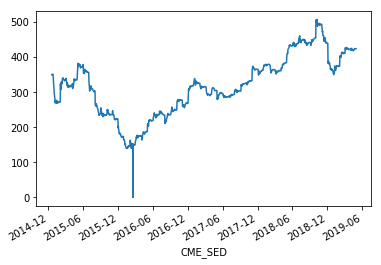

In [2]:
 
def parser(x):
     return datetime.strptime(x, '%m/%d/%Y')
 
series = pd.read_csv('features15.csv', header=0, keep_default_na=False, usecols=[19,20], index_col = 0, parse_dates=[0],squeeze=True, date_parser=parser,  low_memory=False)
print(series.head())
series.plot()
pyplot.show()   

(array([794], dtype=int64),)


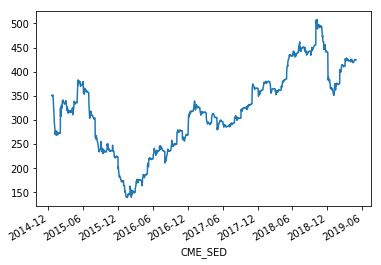

In [4]:
df= series.fillna(0)
df_z = np.abs(stats.zscore(df))
threshhold = 3
print(np.where(df_z>threshhold))
df_o = df[(df_z < threshhold)]

df_o.plot()

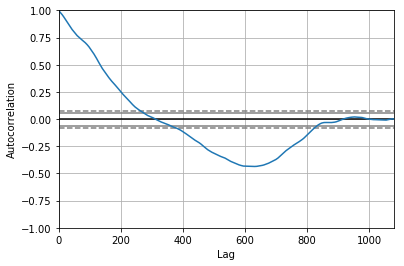

In [5]:
autocorrelation_plot(df_o)
pyplot.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a

                             ARIMA Model Results                              
Dep. Variable:              D.CME_SES   No. Observations:                 1077
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3423.963
Method:                       css-mle   S.D. of innovations              5.814
Date:                Sat, 11 May 2019   AIC                           6861.925
Time:                        17:39:35   BIC                           6896.799
Sample:                             1   HQIC                          6875.132
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0669      0.191     -0.351      0.726      -0.440       0.307
ar.L1.D.CME_SES     0.0239      0.030      0.786      0.432      -0.036       0.084
ar.L2.D.CME_SES     0.0063      

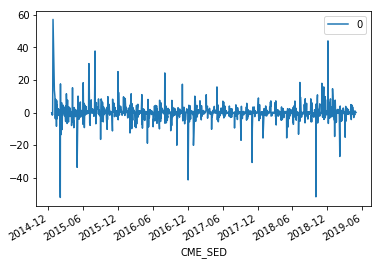

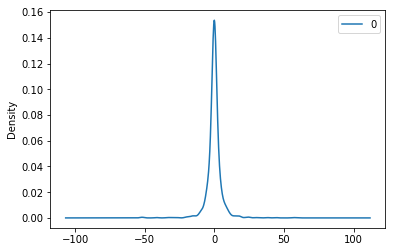

                 0
count  1077.000000
mean     -0.000013
std       5.816450
min     -52.130945
25%      -1.229315
50%       0.001923
75%       1.186639
max      57.173623


In [6]:
model = ARIMA(df_o, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [80]:
ARIMAResults.save(fname= "CME_SE1.h5")

TypeError: save() missing 1 required positional argument: 'self'

In [7]:
X=df_o.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [8]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidime

predicted=231.671863, expected=235.586000
predicted=235.354263, expected=232.058000
predicted=231.395660, expected=226.909000
predicted=226.622867, expected=230.884000
predicted=231.065753, expected=232.951000
predicted=232.417679, expected=235.976000
predicted=235.460536, expected=236.697000
predicted=236.328184, expected=240.618000
predicted=240.680727, expected=241.572000
predicted=241.344335, expected=236.475000
predicted=236.278262, expected=232.446000
predicted=232.556884, expected=228.236000
predicted=228.141521, expected=219.448000
predicted=218.943138, expected=219.448000
predicted=219.244992, expected=219.448000
predicted=218.734542, expected=219.171000
predicted=218.482747, expected=219.899000
predicted=219.425793, expected=219.476000
predicted=219.158517, expected=218.195000
predicted=217.925607, expected=218.955000
predicted=218.778537, expected=220.045000
predicted=219.746954, expected=219.725000
predicted=219.361724, expected=219.633000
predicted=219.397675, expected=221

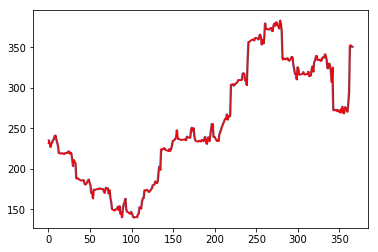

In [19]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')

plt.show()

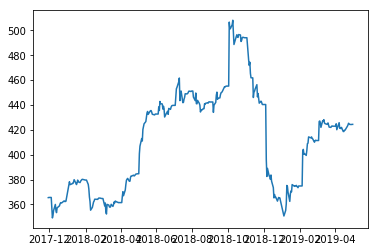

In [21]:
plt.plot(df_o[:350])

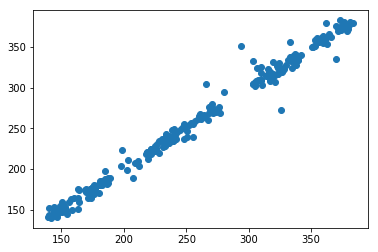

In [28]:
plt.scatter(predictions, test)
